# 빅데이터분석 특강 기말고사

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 1. Fashion_mnist, DNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

- 평가지표로 accuracy를 이용할 것 
- epoch은 10으로 설정할 것 
- optimizer는 adam을 이용할 것 

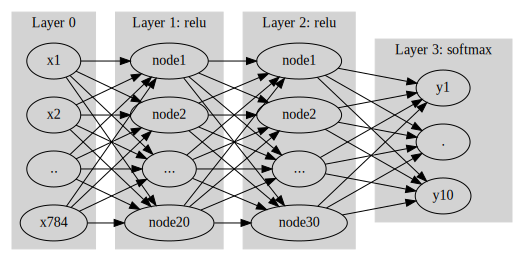

In [5]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [8]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [9]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net1.fit(X,y,epochs=10,batch_size=200)

Epoch 1/10
 12/300 [>.............................] - ETA: 2s - loss: 47.5174 - accuracy: 0.1475  

2022-06-13 19:23:46.524948: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


300/300 [==============================] - 5s 10ms/step - loss: 4.2346 - accuracy: 0.1239
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 2.0610 - accuracy: 0.2200
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 1.9308 - accuracy: 0.2551
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 1.7097 - accuracy: 0.3152
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 1.5139 - accuracy: 0.3766
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 1.3772 - accuracy: 0.4238
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 1.3212 - accuracy: 0.4337
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 1.2995 - accuracy: 0.4386
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 1.2798 - accuracy: 0.4427
Epoch 10/10
300/300 [==============================] - 3s 10ms/step - loss: 1.2686 - accuracy: 0.4484


`(2)` (1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. 

In [10]:
net1.evaluate(XX,yy)

313/313 [==============================] - 4s 12ms/step - loss: 1.2942 - accuracy: 0.4379


[1.29417085647583, 0.43790000677108765]

`(3)` train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가? 

In [15]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics='accuracy')

In [16]:
cb1 = tf.keras.callbacks.TensorBoard()
net1.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/50
240/240 [==============================] - 3s 13ms/step - loss: 4.7876 - accuracy: 0.1153 - val_loss: 2.2636 - val_accuracy: 0.1415
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 2.1072 - accuracy: 0.2081 - val_loss: 2.0320 - val_accuracy: 0.2234
Epoch 3/50
240/240 [==============================] - 3s 12ms/step - loss: 1.9789 - accuracy: 0.2408 - val_loss: 1.9764 - val_accuracy: 0.2341
Epoch 4/50
240/240 [==============================] - 3s 12ms/step - loss: 1.8798 - accuracy: 0.2680 - val_loss: 1.7704 - val_accuracy: 0.3044
Epoch 5/50
240/240 [==============================] - 3s 12ms/step - loss: 1.6724 - accuracy: 0.3203 - val_loss: 1.6192 - val_accuracy: 0.3428
Epoch 6/50
240/240 [==============================] - 3s 13ms/step - loss: 1.4825 - accuracy: 0.3956 - val_loss: 1.3967 - val_accuracy: 0.4302
Epoch 7/50
240/240 [==============================] - 3s 13ms/step - loss: 1.3240 - accuracy: 0.4530 - val_loss: 1.3071 - val_accuracy: 0.4657

In [19]:
%tensorboard --logdir logs --host 0.0.0.0 

**에폭 수가 증가하면서 validation loss도 함께 줄어들고 있기 때문에 과적합으로 보기 힘들다.**

`(4)` (3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라. 

In [20]:
net1.evaluate(XX,yy) 

313/313 [==============================] - 4s 12ms/step - loss: 0.7342 - accuracy: 0.7428


[0.7341800332069397, 0.7427999973297119]

**에폭=10일 때는 0.4379로 성능이 좋지 않았는데 에폭 수를 5배로 늘리니 0.7428로 accuracy가 많이 올라 성능이 좋아졌다.**

`(5)` 조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

In [21]:
!rm -rf logs

In [22]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics='accuracy')

In [23]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3)
net1.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/50
240/240 [==============================] - 3s 13ms/step - loss: 4.7876 - accuracy: 0.1153 - val_loss: 2.2636 - val_accuracy: 0.1415
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 2.1072 - accuracy: 0.2081 - val_loss: 2.0320 - val_accuracy: 0.2234
Epoch 3/50
240/240 [==============================] - 3s 12ms/step - loss: 1.9744 - accuracy: 0.2427 - val_loss: 1.9513 - val_accuracy: 0.2422
Epoch 4/50
240/240 [==============================] - 3s 12ms/step - loss: 1.8787 - accuracy: 0.2666 - val_loss: 1.7628 - val_accuracy: 0.3179
Epoch 5/50
240/240 [==============================] - 3s 13ms/step - loss: 1.6715 - accuracy: 0.3226 - val_loss: 1.6076 - val_accuracy: 0.3467
Epoch 6/50
240/240 [==============================] - 3s 12ms/step - loss: 1.4549 - accuracy: 0.4057 - val_loss: 1.3754 - val_accuracy: 0.4323
Epoch 7/50
240/240 [==============================] - 3s 12ms/step - loss: 1.3207 - accuracy: 0.4534 - val_loss: 1.2725 - val_accuracy: 0.4892

In [33]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 733469), started 0:03:03 ago. (Use '!kill 733469' to kill it.)

In [34]:
!kill 733469

## 2. Fashion_mnist, CNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [27]:
tf.random.set_seed(1234)
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Conv2D(6,(5,5),activation='relu'))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Conv2D(16,(5,5),activation='relu'))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(120,activation='relu'))
net2.add(tf.keras.layers.Dropout(0.2))
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [28]:
c1,m1,c2,m2,flttn,dns1,dropout,dns2 = net2.layers

In [30]:
print(c1(X).shape)
print(m1(c1(X)).shape)
print(c2(m1(c1(X))).shape)
print(m2(c2(m1(c1(X)))).shape)
print(flttn(m2(c2(m1(c1(X))))).shape)
print(dns1(flttn(m2(c2(m1(c1(X)))))).shape)
print(dropout(dns1(flttn(m2(c2(m1(c1(X))))))).shape)
print(dns2(dropout(dns1(flttn(m2(c2(m1(c1(X)))))))).shape)

(60000, 24, 24, 6)
(60000, 12, 12, 6)
(60000, 8, 8, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 120)
(60000, 120)
(60000, 10)


In [31]:
net2.fit(X,y,epochs=10,batch_size=200) 

Epoch 1/10
300/300 [==============================] - 3s 5ms/step - loss: 1.8925 - accuracy: 0.6260
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.6234 - accuracy: 0.7684
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.5294 - accuracy: 0.8035
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4850 - accuracy: 0.8184
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4539 - accuracy: 0.8292
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4292 - accuracy: 0.8393
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4074 - accuracy: 0.8464
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3913 - accuracy: 0.8521
Epoch 9/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3725 - accuracy: 0.8600
Epoch 10/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3595 - accuracy: 0.8645

In [32]:
net2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (200, 24, 24, 6)          156       
                                                                 
 max_pooling2d (MaxPooling2D  (200, 12, 12, 6)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (200, 8, 8, 16)           2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (200, 4, 4, 16)          0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (200, 256)                0         
                                                                 
 dense_12 (Dense)            (200, 120)               

`(2)` n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라. 
- epoc은 3회로 한정한다. 
- validation_split은 0.2로 설정한다. 

In [35]:
from tensorboard.plugins.hparams import api as hp

In [36]:
tf.random.set_seed(1234)
!rm -rf logs
for u in [6,64,128]: 
    for d in [16,256]: 
        logdir = 'logs/hayoung_{}_{}'.format(u,d)
        with tf.summary.create_file_writer(logdir).as_default():
            net2 = tf.keras.Sequential()
            net2.add(tf.keras.layers.Conv2D(u,(5,5),activation='relu'))
            net2.add(tf.keras.layers.MaxPool2D()) 
            net2.add(tf.keras.layers.Conv2D(d,(5,5),activation='relu'))
            net2.add(tf.keras.layers.MaxPool2D()) 
            net2.add(tf.keras.layers.Flatten())
            net2.add(tf.keras.layers.Dense(120,activation='relu'))
            net2.add(tf.keras.layers.Dropout(0.2))
            net2.add(tf.keras.layers.Dense(10,activation='softmax'))
            net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
            cb3 = hp.KerasCallback(logdir, {'n1':u, 'n2':d})
            net2.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb3)
            net2.evaluate(XX,yy)
            _rslt=net2.evaluate(XX,yy)
            tf.summary.scalar('test set loss', _rslt[0], step=1) 

Epoch 1/3
240/240 [==============================] - 2s 8ms/step - loss: 2.2455 - accuracy: 0.6059 - val_loss: 0.6585 - val_accuracy: 0.7548
Epoch 2/3
240/240 [==============================] - 2s 8ms/step - loss: 0.6762 - accuracy: 0.7526 - val_loss: 0.5575 - val_accuracy: 0.7903
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.5335 - accuracy: 0.8078
Epoch 1/3
240/240 [==============================] - 3s 8ms/step - loss: 2.0007 - accuracy: 0.6397 - val_loss: 0.5218 - val_accuracy: 0.8298
Epoch 2/3
240/240 [==============================] - 2s 8ms/step - loss: 0.5668 - accuracy: 0.8051 - val_loss: 0.4241 - val_accuracy: 0.8602
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.4020 - accuracy: 0.8622
Epoch 1/3
240/240 [==============================] - 3s 8ms/step - loss: 1.5706 - accuracy: 0.5409 - val_loss: 0.7083 - val_accuracy: 0.7351
Epoch 2/3
240/240 [==============================] - 2s 8ms/step - loss: 0.6385 - accuracy: 0.7

In [37]:
%tensorboard --logdir logs --host 0.0.0.0

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라. 

- 결과를 텐서보드로 시각화할 필요는 없다. 
- 자유롭게 모형을 설계하여 적합하라. 
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다. 

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [39]:
X = tf.constant(x_train.reshape(-1,32,32,3),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,32,32,3),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [40]:
print(X.shape)
print(y.shape)
print(XX.shape)
print(yy.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [41]:
tf.random.set_seed(1234)
net3 = tf.keras.Sequential()
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.MaxPool2D()) 
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.MaxPool2D()) 
net3.add(tf.keras.layers.Flatten())
net3.add(tf.keras.layers.Dense(128,activation='relu'))
net3.add(tf.keras.layers.Dense(10,activation='softmax'))
net3.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net3.fit(X,y,epochs=10,batch_size=200)

Epoch 1/10
250/250 [==============================] - 38s 137ms/step - loss: 3.1167 - accuracy: 0.3712
Epoch 2/10
250/250 [==============================] - 34s 137ms/step - loss: 1.2347 - accuracy: 0.5644
Epoch 3/10
250/250 [==============================] - 34s 137ms/step - loss: 0.9934 - accuracy: 0.6560
Epoch 4/10
250/250 [==============================] - 34s 137ms/step - loss: 0.8475 - accuracy: 0.7095
Epoch 5/10
250/250 [==============================] - 34s 137ms/step - loss: 0.7328 - accuracy: 0.7503
Epoch 6/10
250/250 [==============================] - 34s 137ms/step - loss: 0.6368 - accuracy: 0.7811
Epoch 7/10
250/250 [==============================] - 34s 137ms/step - loss: 0.5559 - accuracy: 0.8062
Epoch 8/10
250/250 [==============================] - 34s 137ms/step - loss: 0.4690 - accuracy: 0.8380
Epoch 9/10
250/250 [==============================] - 34s 137ms/step - loss: 0.4015 - accuracy: 0.8596
Epoch 10/10
250/250 [==============================] - 34s 137ms/step - l

In [42]:
net3.evaluate(XX,yy)

313/313 [==============================] - 6s 17ms/step - loss: 0.9709 - accuracy: 0.7248


[0.9708801507949829, 0.7247999906539917]

## 4. 다음을 읽고 물음에 답하라. (10점)

`(1)` (1,128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

**A : (1,127,127,5)**

`(2)` (1,24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은? 

**A : (1,9216)**

***(3)-(5)***

아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i$$

여기에서 $t=(t_1,\dots,t_{1000})=$ `np.linspace(0,5,1000)` 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자. 

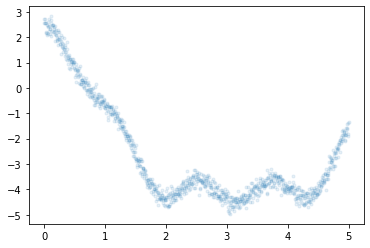

In [8]:
np.random.seed(43052)
t= np.linspace(0,5,1000)
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.1)

tf.keras를 이용하여 $\beta_0,\dots,\beta_5$를 추정하라. ($\beta_0,\dots,\beta_5$의 참값은 각각 -2, 3, 1, 0, 0, 0.5 이다) 

`(3)` 모형에 대한 설명 중 옳은 것을 모두 골라라. 

(하영) 이 모형의 경우 MSEloss를 최소화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 구하는것은 최대우도함수를 최대화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 구하는 것과 같다. 

(재인) 하영의 말이 옳은 이유는 오차항이 정규분포를 따른다는 가정이 있기 때문이다. 

(서연) 이 모형에서 적절한 학습률이 선택되더라도 경사하강법을 이용하면 MSEloss를 최소화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 종종 구할 수 없는 문제가 생긴다. 왜냐하면 손실함수가 convex하지 않아서 local minimum에 빠질 위험이 있기 때문이다. 

(규빈) 만약에 경사하강법 대신 확률적 경사하강법을 쓴다면 local minimum을 언제나 탈출 할 수 있다. 따라서 서연이 언급한 문제점은 생기지 않는다. 

**A : 하영, 재인, 서연**

`(4)` 다음은 아래 모형을 학습한 결과이다. 옳게 해석한 것을 모두 고르시오. 

In [12]:
y = y.reshape(1000,1)
x1 = np.cos(t) 
x2 = np.cos(2*t)
x3 = np.cos(3*t)
x4 = np.cos(4*t)
x5 = np.cos(5*t)
X = tf.stack([x1,x2,x3,x4,x5],axis=1)

In [13]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.45,verbose=0) 

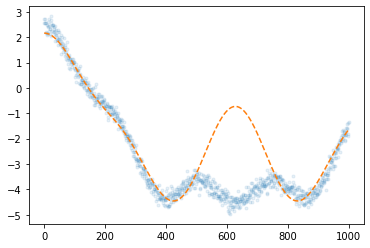

In [14]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

(재인) 처음 550개의 데이터만 학습하고 이후의 450개의 데이터는 학습하지 않고 validation으로 이용하였다. 

(서연) validation에서의 적합결과가 좋지 않다. 

(규빈) validation의 적합결과가 좋지 않기 때문에 오버피팅을 의심할 수 있다. 따라서 만약에 네트워크에 드랍아웃층을 추가한다면 오버피팅을 방지하는 효과가 있어 validation의 loss가 줄어들 것이다. 

(하영) 이 모형의 경우 더 많은 epoch으로 학습한다면 train loss와 validation loss를 둘 다 줄일 수 있다.

**A : 재인, 서연, 하영**

`(5)` 다음을 잘 읽고 참 거짓을 판별하라. 
- Convolution은 선형변환이다. 
- CNN을 이용하면 언제나 손실함수를 MSEloss로 선택해야 한다. 
- CNN은 adam optimizer를 통해서만 최적화할 수 있다.
- 이미지자료는 CNN을 이용하여서만 분석할 수 있으며 DNN으로는 분석불가능하다. 
- CNN은 칼라이미지일 경우에만 적용가능하다. 

**(1) X
(2) X
(3) X
(4) X
(5) X**